# Introduction
Multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis.

In this project will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. 

To address the business' request, I will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

# Step 1: Imports
## Import packages
Import relevant Python libraries and modules.

In [1]:
# Import packages
import pandas as pd
import seaborn as sns

## Load dataset
Pandas was used to load the dataset 'Data HSS' as data

In [2]:
data = pd.read_csv(r"C:\Users\Juls\OneDrive\Insight\Google Advanced Data Analytics\Projects\Data HSS.csv")
# Display the first five rows.
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,6.566231,2.907983,Mega,54.732757
1,Low,9.237765,2.409567,Mega,46.677897
2,Medium,15.886446,2.913410,Mega,150.177829
3,Hight,30.020028,6.922304,Mega,298.246340
4,Low,8.437408,1.405998,Micro,56.594181


# Step 2: Data exploration
## Familiarize with the data's features
* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

Do we have missing values in any columns?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   object 
 1   Radio         4572 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(3), object(2)
memory usage: 178.7+ KB


Yes, we are missing 6 values in the 'Sales'  and 'Social Media'column. I will remove these missing values because they do not represent a large proportion of the data ($12/4572 = 0.002624 \sim 0.26 \%$)

In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4560 non-null   object 
 1   Radio         4560 non-null   float64
 2   Social Media  4560 non-null   float64
 3   Influencer    4560 non-null   object 
 4   Sales         4560 non-null   float64
dtypes: float64(3), object(2)
memory usage: 213.8+ KB


## Create a pairplot of the numerical data
Create a pairplot to visualize the relationship between the continous variables in data.

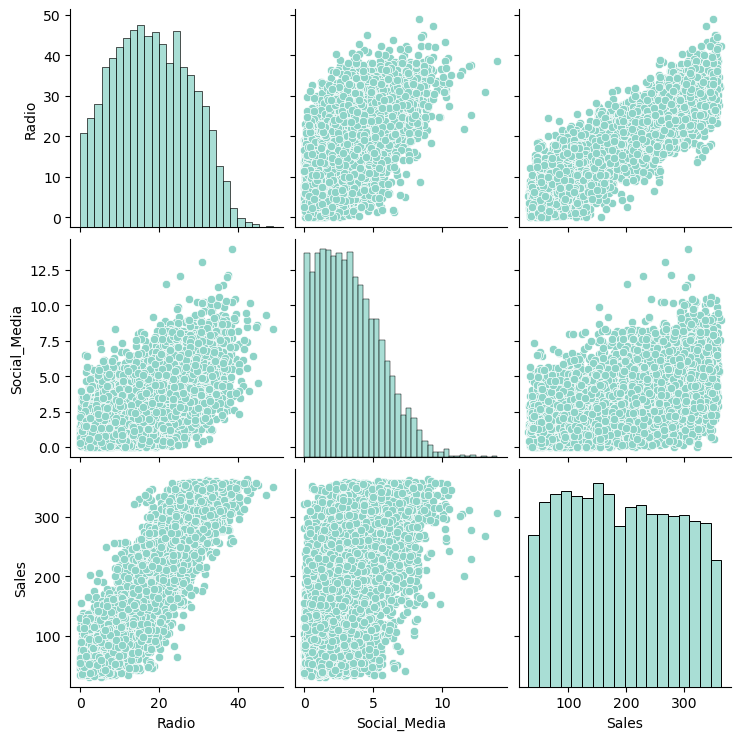

In [96]:
# Create a pairplot of the data.
sns.set_palette("Set3")
sns.pairplot(data, height=2.5)
plt.savefig("binds.jpg")

Which variables have a linear relationship with Sales? Why are some variables in the data excluded from the preceding plot?

1. In the previous plot we can observe that seems that there is a relationshiop between the radio-sales and social media- radio. Because the assumption of No multicollinearity we must choose one of these variables to fir te model. However first we going to try fit the model with all variables
2. The columns TV it is not in the plot due that isn't a number. Pairplot cannot plot a categorical variable.

### Calculate the mean sales for each categorical variable

There are two categorical variables: TV and Influencer. To characterize the relationship between the categorical variables and Sales, find the mean Sales for each category in TV and the mean Sales for each category in Influencer

In [7]:
# Calculate the mean sales for each TV category. 
print(data[['TV', 'Sales']].groupby('TV').mean())
print('')
# Calculate the mean sales for each Influencer category. 
print(data[['Influencer', 'Sales']].groupby('Influencer').mean())

             Sales
TV                
Hight   302.918844
Low      87.875936
Medium  192.746383

                 Sales
Influencer            
Macro       195.511248
Mega        190.598618
Micro       191.809095
Nano        191.977708


The average Sales for High TV promotions is considerably higher than for Medium and Low TV promotions. TV may be a strong predictor of Sales.

The categories for Influencer have different average Sales, but the variation is not substantial. Influencer may be a weak predictor of Sales.

### Clean column names
The ols() function doesn't run when variable names contain a space

In [8]:
# Rename all columns in data that contain a space. 
data.columns = ['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales']
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,6.566231,2.907983,Mega,54.732757
1,Low,9.237765,2.409567,Mega,46.677897
2,Medium,15.886446,2.913410,Mega,150.177829
3,Hight,30.020028,6.922304,Mega,298.246340
4,Low,8.437408,1.405998,Micro,56.594181


# Model building

## Fit a multiple linear regression model that predicts sales
Using the independent variables that I choice (All of them), fit a multiple linear regression model that predicts Sales. And after taht I will analyze the P-values for each variable to determine if there are statistic significance betweeen the dependent variable an each independent variable.

In [9]:
# Define the OLS formula.
ols_formula = 'Sales ~ Radio + C(TV) + Social_Media + C(Influencer)'
# Create an OLS model.
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data = data)
# Fit the model.
model = OLS.fit()
# Save the results summary.
summary = model.summary()
# Display the model results.
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     6754.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:18:47   Log-Likelihood:                -21600.
No. Observations:                4560   AIC:                         4.322e+04
Df Residuals:                    4552   BIC:                         4.327e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                221.8610      2.328     95.298      0.000     217.297     226.425
C(TV)[T.Low]            -158.9986      1.757    -90.473      0.000    -162.444    -155.553
C(TV)[T.Medium]          -80.3480      1.267    -63.426      0.000     -82.832     -77.864
C(Influencer)[T.Mega]     -1.1681      1.159     -1.007      0.314      -3.441       1.105
C(Influencer)[T.Micro]    -0.7591      1.160     -0.654      0.513      -3.033       1.515
C(Influencer)[T.Nano]      0.2799      1.164      0.240      0.810      -2.002       2.562
Radio                      2.8640      0.081     35.496      0.000       2.706       3.022
Social_Media               0.0889      0.233      0.382      0.703      -0.368       0.546
==============================================================================
Omnibus:                       89.979   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.345
Skew:                           0.056   Prob(JB):                     1.17e-11
Kurtosis:                       2.498   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe a lot of features in the summary of the model. Is focus in default coefficients and P-values
1. Coefficients
    * The default TV category for the model is High since there are coefficients for the other two TV categories.
    * The default Influencer category for the model is Macro since there are coefficients for the other two Influencer categories.
    * The coefficient for Radio, Social_Media is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.
2. P-Values: First
   * The p-value for the coefficients that is $0.000$, meaning coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. The variables that are statistically significant are C(TV)[T.Low], C(TV)[T.Medium], Radio
   * The p-value for the coefficients that is $>0.05$, meaning coefficients are not statistically significant. That means that the relation between these variables and the result variable maybe is due the chance.
     To clear this aasumption remember the possible hypotesis
     
     $H_0 = \beta_0 = 0$ This means that **there is no** relationship between the variables (each independent variable with the dependent variable). To reject this hypothesis our p-values must be larger than 0.05
     
     $H_0 = \beta_1 \neq 0$ This means that **there is** relationship between the variables. 
**Let's remove this variables of the model and check if the accurance change** Keeping in midn that the $Adj. R-squared = 	0.912$

In [10]:
# Define the OLS formula.
ols_formula = 'Sales ~ Radio + C(TV)'
# Create an OLS model.
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data = data)
# Fit the model.
model = OLS.fit()
# Save the results summary.
summary = model.summary()
# Display the model results.
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:18:48   Log-Likelihood:                -21601.
No. Observations:                4560   AIC:                         4.321e+04
Df Residuals:                    4556   BIC:                         4.323e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         221.5573      2.213    100.094      0.000     217.218     225.897
C(TV)[T.Low]     -159.0302      1.757    -90.528      0.000    -162.474    -155.586
C(TV)[T.Medium]   -80.3869      1.266    -63.495      0.000     -82.869     -77.905
Radio               2.8753      0.074     38.876      0.000       2.730       3.020
==============================================================================
Omnibus:                       90.005   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.336
Skew:                           0.056   Prob(JB):                     1.17e-11
Kurtosis:                       2.498   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe that the $Adj. R-squared $ value don't change. Therefore we can't drop this variables based on the p-value due this variables don't give relevant infomation to model better multivrible regression lineal 

Why do I select these variables to the model?
* `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
* `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
* `Social Media` was not selected because it did not increase model performance and it was later determined to be correlated with another independent variable: `Radio`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the preceding analysis.

## Check model assumptions
For multiple linear regression, There is an assumption that must be met:

* Linearity: With multiple linear regression, you need to consider whether each x variable has a linear relationship with the y variable. 
* Independent observations: Each observation in the dataset is independent.
* (Multivariate) Normality: The errors are normally distributed.
* Homoscedasticity: The variance of the errors is constant or similar across the model.
* No multicollinearity: No two independent variables ($ x_i$ and $x_j$ ) can't be highly correlated with each other

Check that all five multiple linear regression assumptions are upheld for my model.

### Linearity
I perform scatterplots comparing the continuous independent variable(s) I selected previously with Sales to check the linearity assumption. 

Text(0.5, 1.0, 'Radio and Sales')

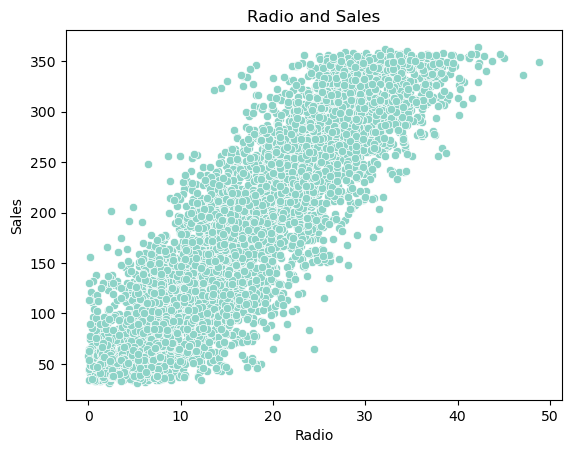

In [11]:
fig = sns.scatterplot(x = data['Radio'], y = data['Sales'])
fig.set_title("Radio and Sales")

**The linearity assumption holds for Radio, as there is a clear linear relationship in the scatterplot between Radio and Sales**

### Model assumption: Independence 
The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotionis independent from one another, the independence assumption is not violated

### Normality 
* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

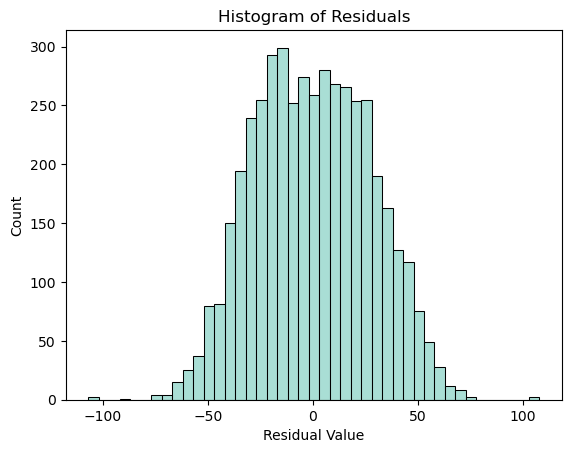

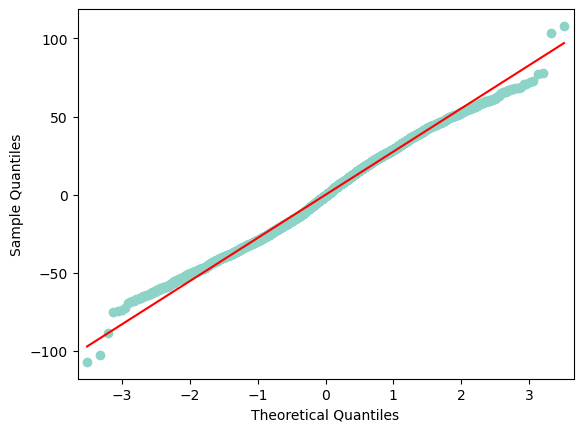

In [12]:
residuals = model.resid
# Create a histogram with the residuals. 
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()
# Create a Q-Q plot of the residuals.
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show() 

**The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.**

### Constant variance
Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.


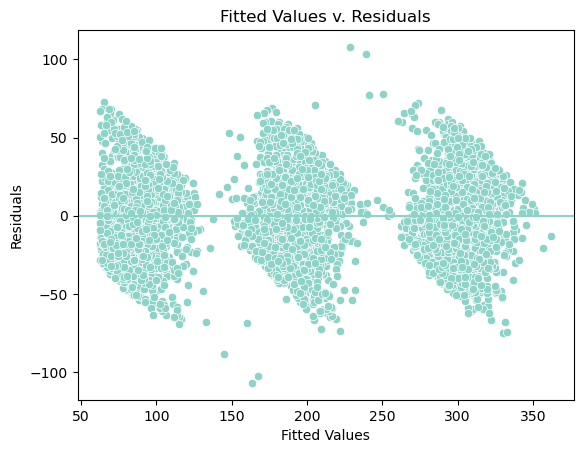

In [13]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
# Set the x axis label.
fig.set_xlabel("Fitted Values")
# Set the y axis label.
fig.set_ylabel("Residuals")
# Set the title.
fig.set_title("Fitted Values v. Residuals")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)
# Show the plot.
plt.show()

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### No multicollinearity
The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables


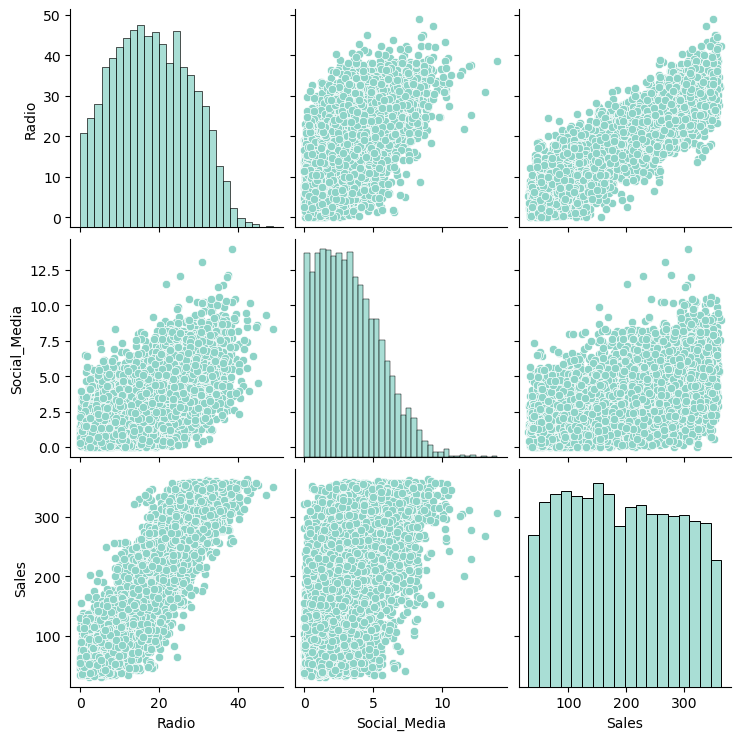

In [14]:
# Create a pairplot of the data.
sns.pairplot(data)

* Use the variance inflation factor to detect multicollinearity

In [15]:
# Calculate the variance inflation factor (optional).
# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]
# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])
# Display the VIF results.
df_vif

,VIF
Radio,4.936824
Social_Media,4.936824


**The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.**

If a model used both Radio and Social_Media as predictors, there would be a moderate linear relationship between Radio and Social_Media that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both Radio and Social_Media are included in the model is 5.17 for each variable, indicating high multicollinearity.

# Results and evaluation

## Display the OLS regression results

In [16]:
# Display the model results summary.
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:18:48   Log-Likelihood:                -21601.
No. Observations:                4560   AIC:                         4.321e+04
Df Residuals:                    4556   BIC:                         4.323e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         221.5573      2.213    100.094      0.000     217.218     225.897
C(TV)[T.Low]     -159.0302      1.757    -90.528      0.000    -162.474    -155.586
C(TV)[T.Medium]   -80.3869      1.266    -63.495      0.000     -82.869     -77.905
Radio               2.8753      0.074     38.876      0.000       2.730       3.020
==============================================================================
Omnibus:                       90.005   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.336
Skew:                           0.056   Prob(JB):                     1.17e-11
Kurtosis:                       2.498   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using TV and Radio as the independent variables results in a multiple linear regression model with  𝑅2=0.912
 . In other words, the model explains  91.2%  of the variation in Sales. **This makes the model an excellent predictor of Sales.**

## Interpret model coefficients
When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  221.5573$
* $\beta_{TVLow}= -159.0302$
* $\beta_{TVMedium} = -80.3869$
* $\beta_{Radio} =  2.8753$

Writting the relationship between `Sales` and the independent variables as a linear equation?


$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 221.5573  -159.0302*X_{TVLow} -80.3869*X_{TVMedium}+ 2.8753 *X_{Radio}$

* The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level.
* The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.
* The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 


# Conclusions
* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.
* According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 

# Bonus c:

How can we know if my regression model is good? What other measurement we have? let's divide the data into test, train and compare how is the performance in the test data.

In [24]:
# Divide the dataset into x,y variables
x = data[['TV', 'Radio']]
y = data['Sales']

In [27]:
#Divide the data into test and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [30]:
# Define the OLS formula.
ols_formula = 'Sales ~ Radio + C(TV)'
# Define ols_data
ols_data = pd.concat([x_train, y_train],axis = 1)
# Create an OLS model.
OLS = ols(formula = ols_formula, data = ols_data)
# Fit the model.
model = OLS.fit()
# Save the results summary.
summary = model.summary()
# Display the model results.
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:32:00   Log-Likelihood:                -15115.
No. Observations:                3192   AIC:                         3.024e+04
Df Residuals:                    3188   BIC:                         3.026e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         222.0854      2.610     85.092      0.000     216.968     227.203
C(TV)[T.Low]     -160.0621      2.081    -76.915      0.000    -164.142    -155.982
C(TV)[T.Medium]   -79.8073      1.496    -53.335      0.000     -82.741     -76.873
Radio               2.8237      0.087     32.372      0.000       2.653       2.995
==============================================================================
Omnibus:                       70.368   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.067
Skew:                           0.094   Prob(JB):                     1.99e-09
Kurtosis:                       2.484   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Compare model coefficients
When `TV` and `Radio` are used to predict `Sales`, the difference berween the model coefficients are:

* $\beta_{0} =  222.0854 $ before the value was $221.5573$
* $\beta_{TVLow}= 160.0621 $ before the value was$-159.0302$
* $\beta_{TVMedium} = -79.8073$ before the value was$-80.3869$
* $\beta_{Radio} =  2.8237$ before the value was $2.8753$

$\text{Sales} = 222.0854  -160.0621*X_{TVLow} -79.8073*X_{TVMedium}+  2.8237 *X_{Radio}$

We can observe a slight difference but it seems like the train_model will perform as the general model.

What is the difference between y_pred the train_model and the real y?



In [63]:
y_pred_test = model.predict(x_test)
test_data = pd.concat([x_test, y_pred_test], axis = 1)
test_data.columns = ['TV', 'Radio', 'Sales_test'] 
test_data

,TV,Radio,Sales_test
483,Medium,18.097007,193.378338
2658,Medium,9.080774,167.919323
23,Hight,37.263819,327.306708
3489,Medium,19.532307,197.431175
135,Low,17.449475,111.295094
...,...,...,...
2314,Hight,27.779895,300.527084
2770,Low,13.310991,99.609313
2661,Hight,30.910300,309.366365
3618,Medium,26.375817,216.755099


In [90]:
diff = pd.merge(test_data, data, on=['TV', 'Radio'], how='left')
diff = diff.drop(['Social_Media', 'Influencer'], axis=1)
diff.columns = ['TV' , 'Radio',	'Sales_test', 'Sales_real']
diff['diff'] = abs(diff['Sales_test'] - diff['Sales_real'])
diff['%'] = abs(diff['Sales_test'] / diff['Sales_real'] - 1 ) * 100
diff.head()

,TV,Radio,Sales_test,Sales_real,diff,%
0,Medium,18.097007,193.378338,160.435104,32.943234,20.533682
1,Medium,9.080774,167.919323,146.910150,21.009173,14.300696
2,Hight,37.263819,327.306708,349.861575,22.554867,6.446797
3,Medium,19.532307,197.431175,235.918765,38.487590,16.313916
4,Low,17.449475,111.295094,119.330807,8.035713,6.733980


How is the performance of the train model? What is the difference between estimated and actual sales?

In [94]:
print(diff[['TV', 'diff']].groupby('TV').mean('diff'))

print("")

print(diff[['TV', '%']].groupby('TV').mean('%'))

             diff
TV               
Hight   22.871490
Low     23.453686
Medium  23.293183

                %
TV               
Hight    7.514935
Low     30.809357
Medium  12.869885


We can observe that the difference between the real sales and estimated sales is roughtly 23 regardless the category of TV variable. Nonetheless The percentage is greater in the 'Low' category. It means that our model have a poorest performance when the category is 'Low' of TV variable. Maybe we must generate a model for each category to guarantee better results in this aspect.

**Thank you for coming this far, I hope the content of this notebook has been clear and useful. c:**